In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ucs = pd.read_csv('../../data/clean/ucs_cleaned.csv', parse_dates=['Date of Launch'])

In [8]:
ucs.dtypes

Name of Satellite, Alternate Names            object
Current Official Name of Satellite            object
Country/Org of UN Registry                    object
Country of Operator/Owner                     object
Operator/Owner                                object
Users                                         object
Purpose                                       object
Class of Orbit                                object
Type of Orbit                                 object
Longitude of GEO (degrees)                   float64
Perigee (km)                                 float64
Apogee (km)                                  float64
Eccentricity                                 float64
Inclination (degrees)                        float64
Period (minutes)                              object
Launch Mass (kg.)                            float64
Date of Launch                        datetime64[ns]
Expected Lifetime (yrs.)                     float64
Contractor                                    

LAUNCH MASS

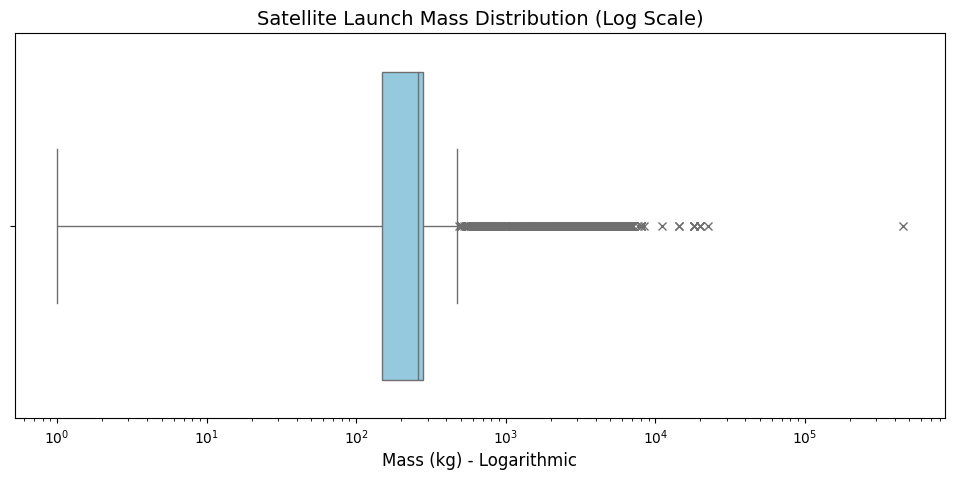

In [2]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=ucs['Launch Mass (kg.)'], color='skyblue', 
            flierprops={"marker": "x", "markerfacecolor": "red"})

plt.xscale('log')

plt.title('Satellite Launch Mass Distribution (Log Scale)', fontsize=14)
plt.xlabel('Mass (kg) - Logarithmic', fontsize=12)
plt.show()

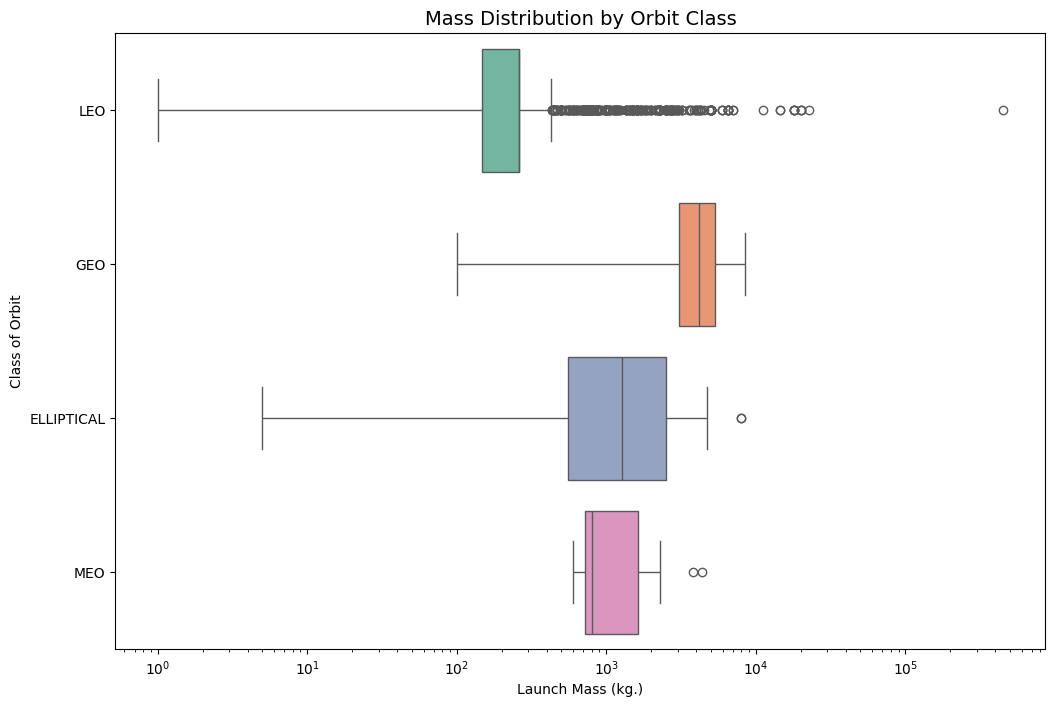

In [3]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ucs, 
            x='Launch Mass (kg.)', 
            y='Class of Orbit', 
            hue='Class of Orbit', 
            palette='Set2', 
            legend=False)

plt.xscale('log')
plt.title('Mass Distribution by Orbit Class', fontsize=14)
plt.show()

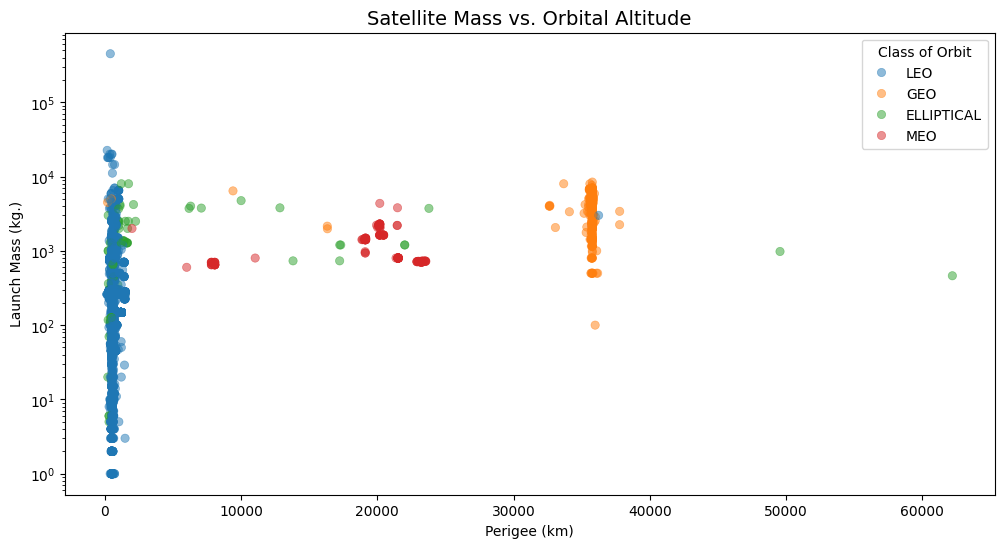

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
                data = ucs,
                x = 'Perigee (km)',
                y = 'Launch Mass (kg.)', 
                hue = 'Class of Orbit',
                alpha = 0.5,
                edgecolor = None)

plt.yscale('log')
plt.title('Satellite Mass vs. Orbital Altitude', fontsize=14)
plt.show()

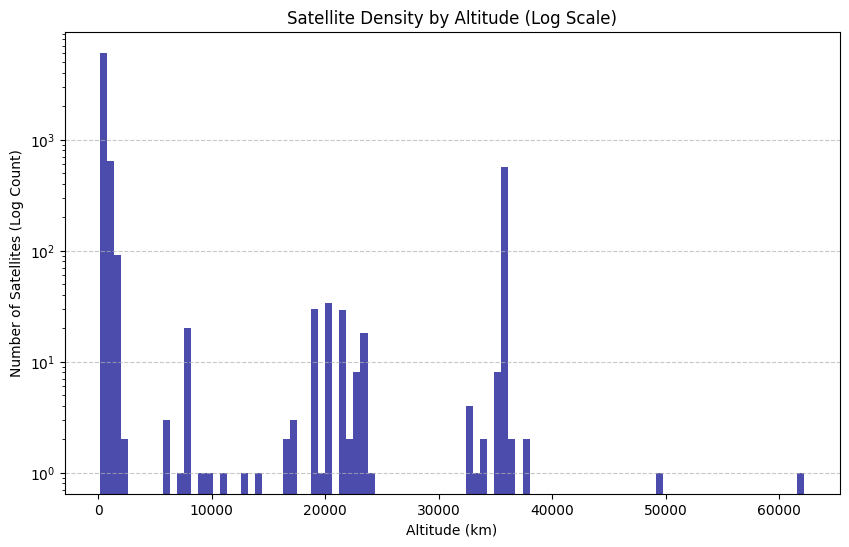

In [5]:
plt.figure(figsize=(10,6))
plt.hist(ucs['Perigee (km)'], bins=100, color='darkblue', alpha=0.7)
plt.yscale('log') 
plt.title('Satellite Density by Altitude (Log Scale)')
plt.xlabel('Altitude (km)')
plt.ylabel('Number of Satellites (Log Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Date of Launch'>

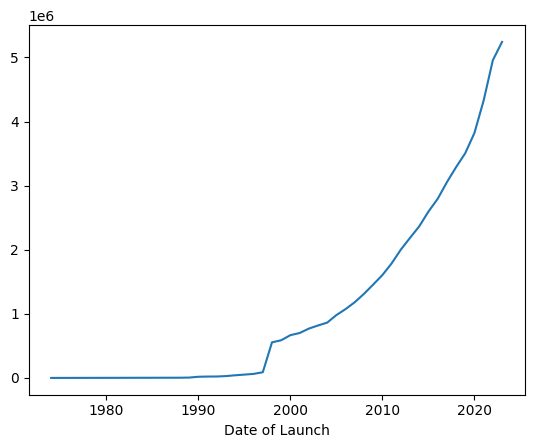

In [6]:
mass_trend = ucs.groupby(ucs['Date of Launch'].dt.year)['Launch Mass (kg.)'].sum().cumsum()
mass_trend.plot()

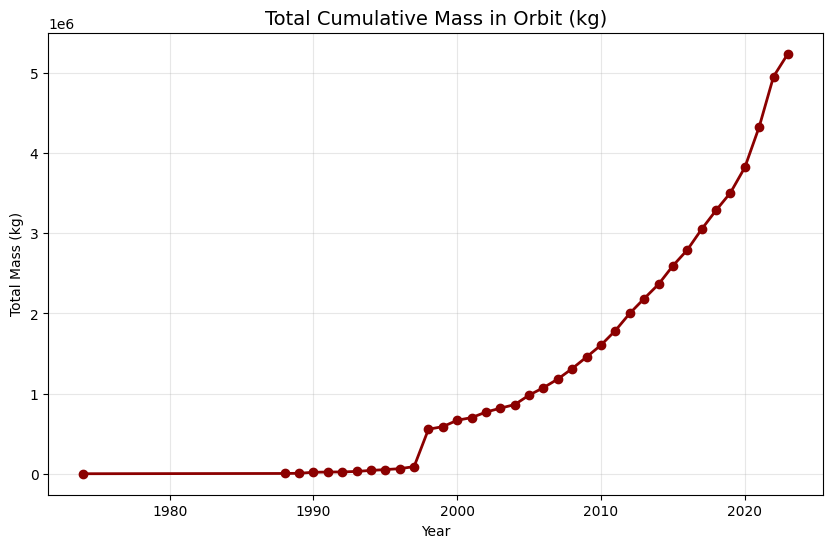

In [7]:
mass_by_year = ucs.groupby(ucs['Date of Launch'].dt.year)['Launch Mass (kg.)'].sum().cumsum()

plt.figure(figsize=(10, 6))

mass_by_year.plot(kind='line', marker='o', color='darkred', linewidth=2)

plt.title('Total Cumulative Mass in Orbit (kg)', fontsize=14)
plt.ylabel('Total Mass (kg)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)
plt.show()